In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB #Use for testing for now
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier





Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
account_dataset = pd.read_csv('account_data.csv')
churn_dataset = pd.read_csv('BankChurners.csv')

In [27]:
account_dataset.head(5)

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


In [28]:
churn_dataset.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [29]:
account_dataset = account_dataset.dropna()
churn_dataset = churn_dataset.dropna()

In [30]:
account_dataset.isnull().sum()

Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

In [31]:
churn_dataset.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [32]:
churn_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace=True)
churn_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)


In [33]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [34]:
account_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

<h1>INSERT YOUR DATA VISUALIZATION CODES ABOVE DATA TRANSFORMATION CODE</h1>

In [35]:
#Data Transformation for the account dataset

categorical_columns = account_dataset.select_dtypes(include=['object']).columns
exclude_column = 'TimeofTransaction'
categorical_columns = categorical_columns[categorical_columns != exclude_column]

#Transform the categorical columns into numerical values
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    account_dataset[column] = label_encoder.fit_transform(account_dataset[column])
    label_encoders[column] = label_encoder

#Put values in a dictionary to compare and see what is the transformed value and original value
for column, encoder in label_encoders.items():
    print(f"\nMappings for {column}:")
    for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
        print(f"{original_value} -> {encoded_value}")


Mappings for Occupation:
Accountant -> 0
Architect -> 1
Artist -> 2
Chef -> 3
Clerk -> 4
Designer -> 5
Doctor -> 6
Engineer -> 7
Entrepreneur -> 8
Lawyer -> 9
Manager -> 10
Musician -> 11
Retired -> 12
Self-employed -> 13
Software Developer -> 14
Student -> 15
Teacher -> 16
Technician -> 17
Unemployed -> 18

Mappings for MaritalStatus:
Divorced -> 0
Married -> 1
Single -> 2

Mappings for ResidentialStatus:
Live with Parents -> 0
Own -> 1
Rent -> 2

Mappings for PurposeoftheLoan:
auto -> 0
education -> 1
home -> 2
medical -> 3
personal -> 4
travel -> 5

Mappings for Collateral:
No -> 0
Yes -> 1

Mappings for ApplicationBehavior:
Normal -> 0
Rapid -> 1

Mappings for LocationofApplication:
Local -> 0
Unusual -> 1

Mappings for ChangeinBehavior:
No -> 0
Yes -> 1

Mappings for AccountActivity:
Normal -> 0
Unusual -> 1

Mappings for PaymentBehavior:
Defaulted -> 0
Late -> 1
On-time -> 2

Mappings for Blacklists:
No -> 0
Yes -> 1

Mappings for EmploymentVerification:
Not Verified -> 0
Verifi

<h5>One hot encoding code</h5>

In [36]:
# # Select categorical columns excluding 'TimeofTransaction' --> Too much fields to consider
# categorical_columns = account_dataset.select_dtypes(include=['object']).columns
# exclude_column = 'TimeofTransaction'
# categorical_columns = categorical_columns[categorical_columns != exclude_column]

# # Transform categorical columns
# one_hot_encoders = {}
# encoded_dfs = []

# for column in categorical_columns:
#     one_hot_encoder = OneHotEncoder(sparse=False, dtype=int)
#     transformed = one_hot_encoder.fit_transform(account_dataset[[column]])
    
#     # Store the encoder
#     one_hot_encoders[column] = one_hot_encoder
    
#     # Create a DataFrame for the encoded values
#     encoded_df = pd.DataFrame(
#         transformed,
#         columns=[f"{column}_{category}" for category in one_hot_encoder.categories_[0]]
#     )
#     encoded_dfs.append(encoded_df)

# # Combine the original dataset with the encoded columns
# account_dataset = pd.concat([account_dataset.drop(columns=categorical_columns), *encoded_dfs], axis=1)

# # Display mappings
# for column, encoder in one_hot_encoders.items():
#     print(f"\nMappings for {column}:")
#     for original_value, encoded_value in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
#         print(f"{original_value} -> One-hot encoded as {encoded_value}")

In [37]:
#Data Transformation for the churn dataset

categorical_columns = churn_dataset.select_dtypes(include=['object']).columns

#Transform the categorical columns into numerical values
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    churn_dataset[column] = label_encoder.fit_transform(churn_dataset[column])
    label_encoders[column] = label_encoder

#Put values in a dictionary to compare and see what is the transformed value and original value
for column, encoder in label_encoders.items():
    print(f"\nMappings for {column}:")
    for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
        print(f"{original_value} -> {encoded_value}")


Mappings for Attrition_Flag:
Attrited Customer -> 0
Existing Customer -> 1

Mappings for Gender:
F -> 0
M -> 1

Mappings for Education_Level:
College -> 0
Doctorate -> 1
Graduate -> 2
High School -> 3
Post-Graduate -> 4
Uneducated -> 5
Unknown -> 6

Mappings for Marital_Status:
Divorced -> 0
Married -> 1
Single -> 2
Unknown -> 3

Mappings for Income_Category:
$120K + -> 0
$40K - $60K -> 1
$60K - $80K -> 2
$80K - $120K -> 3
Less than $40K -> 4
Unknown -> 5

Mappings for Card_Category:
Blue -> 0
Gold -> 1
Platinum -> 2
Silver -> 3


In [38]:
#Inspect individual column's value transformation (This is to print the transformed value and original value)

# specified_column = 'Cooking_With'

# if specified_column in label_encoders:
#     print(f"Mappings for {specified_column}:")
#     encoder = label_encoders[specified_column]
#     for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
#         print(f"{original_value} -> {encoded_value}")
# else:
#     print(f"The column '{specified_column}' was not found or is not a categorical column.")

In [39]:
# # Convert the 'TimeofTransaction' column values to integers --> KIV this
# account_dataset.replace({'TimeofTransaction': {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}}, inplace=True)
# account_dataset['TimeofTransaction'] = account_dataset['TimeofTransaction'].astype(int)

# account_dataset.info()

account_dataset['TimeofTransaction'] = pd.to_datetime(account_dataset['TimeofTransaction'], format='%H:%M')

# Define a function to categorize the time
def categorize_time(hour):
    if 5 <= hour < 12:  # Morning
        return 1
    elif 12 <= hour < 18:  # Afternoon
        return 2
    elif 18 <= hour < 22:  # Evening
        return 3
    else:  # Night
        return 4

# Apply the function to categorize times
account_dataset['TimeCategory'] = account_dataset['TimeofTransaction'].dt.hour.apply(categorize_time)
account_dataset.drop(['TimeofTransaction'], axis=1, inplace=True)
account_dataset.head()


,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud,TimeCategory
0,56,16,0,4,1,1,827,52033,300000,25,...,2,0,1,0,3,1,0,1,0,1
1,40,7,2,0,2,1,830,42893,8105,3,...,2,0,1,0,1,0,0,0,0,2
2,25,4,1,0,0,360,809,141233,75734,19,...,2,1,1,0,1,0,0,1,0,4
3,34,18,2,0,2,92,630,9217,2000,1,...,0,0,0,1,2,0,1,0,1,2
4,47,14,2,0,2,26,733,47979,67767,1,...,2,0,1,0,1,0,0,0,0,2


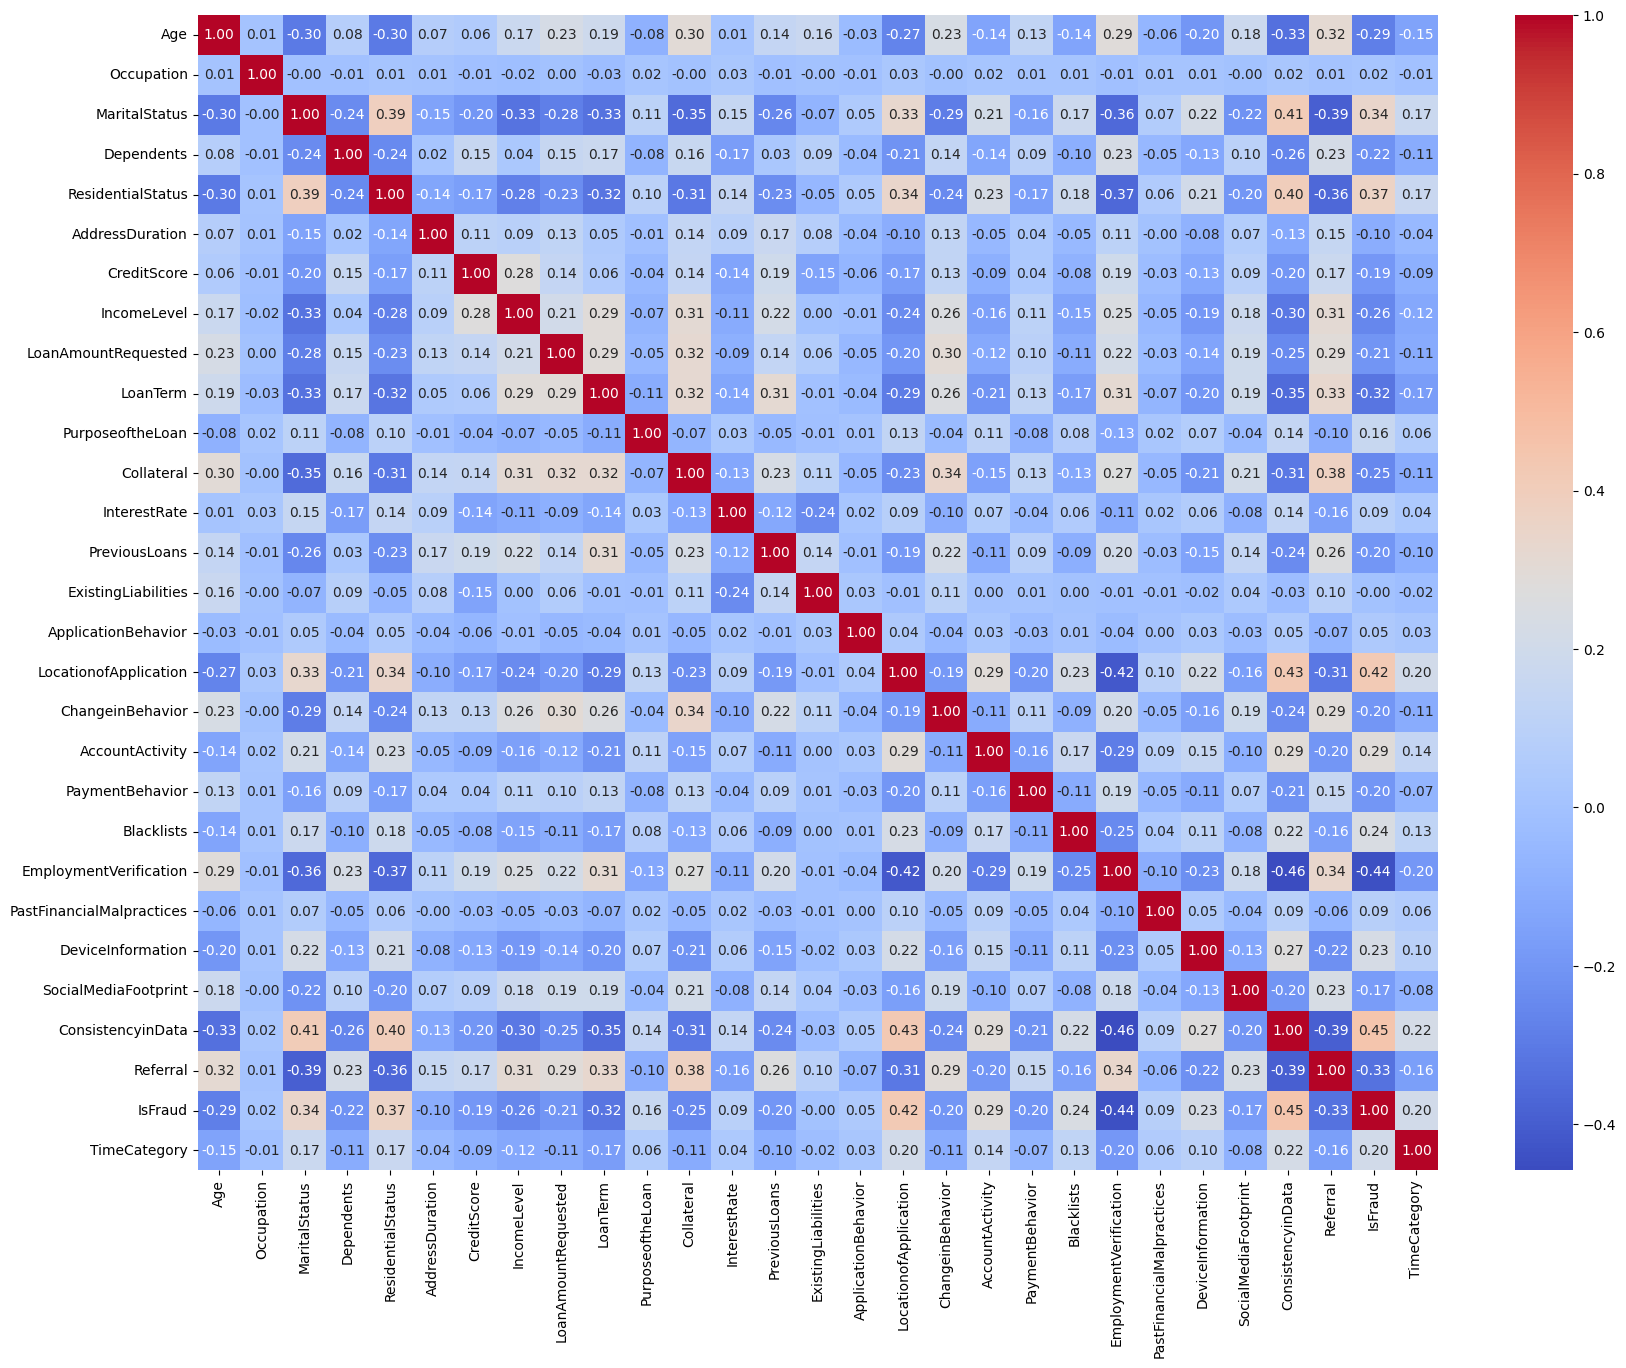

In [40]:
plt.figure(figsize=(20, 15))
sns.heatmap(account_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# columns_to_retain = ['LoanAmountRequested', 'LoanTerm', 'ExistingLiabilities', 'PreviousLoans', 'Dependents', 'Occupation', 'IncomeLevel', 'ResidentialStatus', 'CreditScore', 'IsFraud']

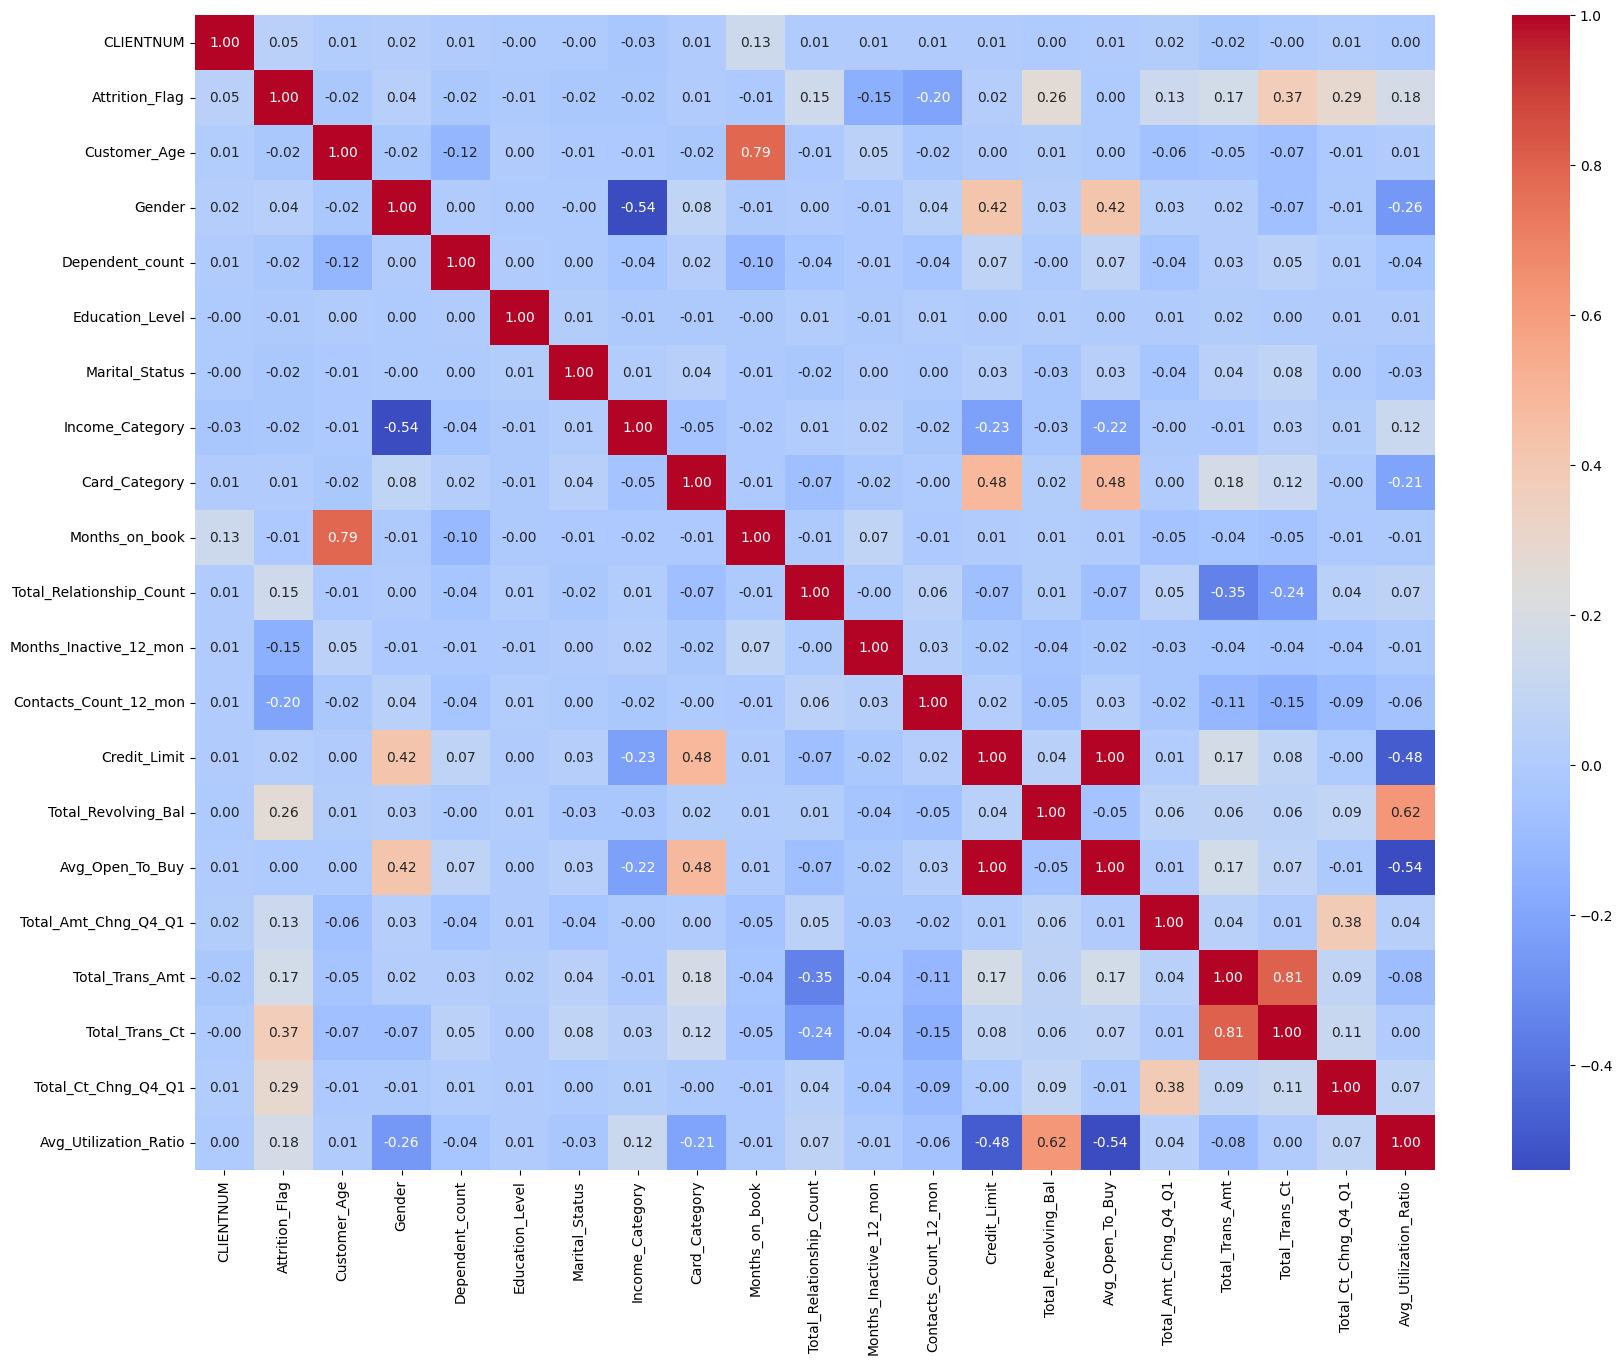

In [41]:
plt.figure(figsize=(20, 15))
sns.heatmap(churn_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [42]:
Xacc = account_dataset.drop(['IsFraud'], axis=1)
Yacc = account_dataset['IsFraud']

Xacc_train, Xacc_test, Yacc_train, Yacc_test = model_selection.train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

In [43]:
sc = StandardScaler()
Xacc_train = sc.fit_transform(Xacc_train)
Xacc_test = sc.transform(Xacc_test)
#print(Xacc_train)

LogReg = linear_model.LogisticRegression()
DTClassifier = DecisionTreeClassifier()
RFClassifier = RandomForestClassifier()
SVMClassifier = SVC()
KNNClassifier = KNeighborsClassifier()
GBClassifier = GradientBoostingClassifier()

LogReg.fit(Xacc_train, Yacc_train)
Yacc_log = LogReg.predict(Xacc_test)

In [44]:
DataFrame = pd.DataFrame({"Actual Fraud or Not": Yacc_test, 'Predicted Fraud or Not': Yacc_log})
DataFrame

,Actual Fraud or Not,Predicted Fraud or Not
9953,0,0
3850,0,0
4962,0,0
3886,0,0
5437,0,0
...,...,...
5273,1,1
8014,0,0
8984,1,1
6498,1,0


In [45]:
accuracy = accuracy_score(Yacc_test, Yacc_log) # Accuracy classification score
report = classification_report(Yacc_test, Yacc_log) # Build a text report showing the main classification metrics
conf_matrix = confusion_matrix(Yacc_test, Yacc_log) # Compute confusion matrix to evaluate the accuracy of a classification

print("Validation Accuracy:", accuracy) 
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Validation Accuracy: 0.845

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2307
           1       0.72      0.54      0.62       693

    accuracy                           0.84      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.84      0.84      0.84      3000


Confusion Matrix:
 [[2161  146]
 [ 319  374]]


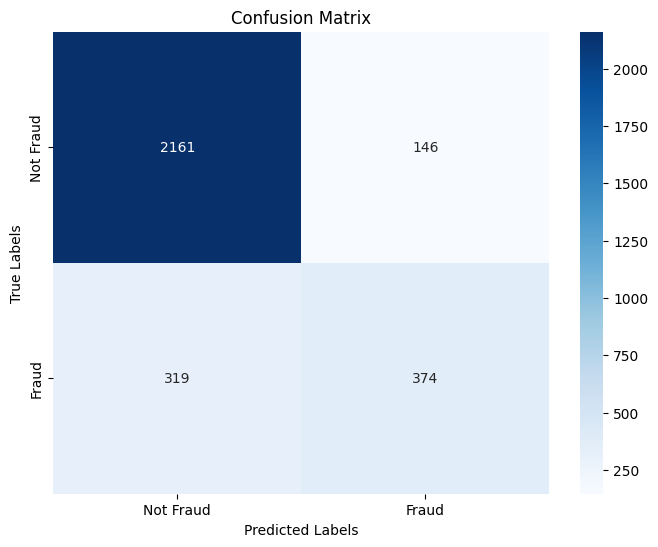

In [46]:
# Define labels for the heatmap
labels = ['Not Fraud', 'Fraud']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Gradient Boosting Classification Model Code

Accuracy: 0.87
Classification Report:
[[5164  303]
 [ 583  950]]


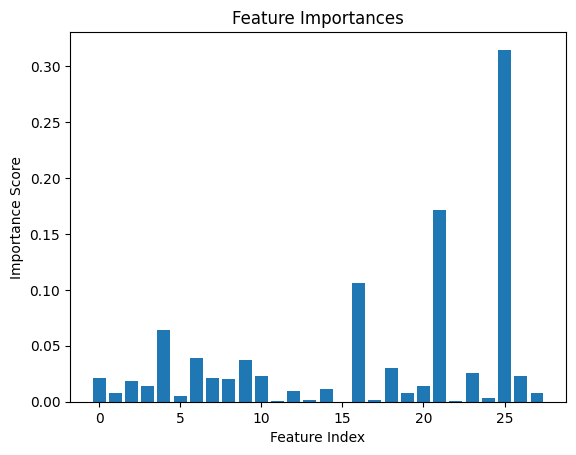

In [49]:
# Instantiate model
GBClassifier = GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.1, max_depth= 3, random_state = 42)

GBClassifier.fit(Xacc_train, Yacc_train)
Yacc_gb = GBClassifier.predict(Xacc_train)

# For evaluating the model
accuracy = accuracy_score(Yacc_train, Yacc_gb)
print(f"Accuracy: {accuracy:.2f}")

#Classification Report
print("Classification Report:")
print(confusion_matrix(Yacc_train, Yacc_gb))

#Feature Importance
featureImportances = GBClassifier.feature_importances_
plt.bar(range(len(featureImportances)), featureImportances)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.show()